# Basic

## 1. torch 和 numpy 相互转化
## 2. torch数学运算
## 3. 矩阵运算

# Variable

>  Variable 计算时, 它在背景幕布后面一步步默默地搭建着一个庞大的系统, 叫做计算图, computational graph. 这个图是用来干嘛的? 原来是将所有的计算步骤 (节点) 都连接起来, 最后进行误差反向传递的时候, 一次性将所有 variable 里面的修改幅度 (梯度) 都计算出来, 而 tensor 就没有这个能力啦.

# Activation

# Regression Example

[doc](http://pytorch.org/tutorials/index.html)
[API](http://pytorch.org/docs/master/torch.html)

In [6]:
import torch
import numpy as np
# torch 和 numpy 相互转化
np_data = np.arange(6).reshape((2,3))
torch_data = torch.from_numpy(np_data)
tensor2array = torch_data.numpy()
print(
    '\nnumpy array:', np_data,
    '\ntorch tensor:', torch_data,
    '\ntensor to array:', tensor2array,
)

# 数学运算
# abs 绝对值计算
data = [-1, -2, 1, 2]
tensor = torch.FloatTensor(data)  # 转换成32位浮点 tensor
print(
    '\nabs',
    '\nnumpy: ', np.abs(data),          # [1 2 1 2]
    '\ntorch: ', torch.abs(tensor)      # [1 2 1 2]
)

# sin   三角函数 sin
print(
    '\nsin',
    '\nnumpy: ', np.sin(data),      # [-0.84147098 -0.90929743  0.84147098  0.90929743]
    '\ntorch: ', torch.sin(tensor)  # [-0.8415 -0.9093  0.8415  0.9093]
)

# mean  均值
print(
    '\nmean',
    '\nnumpy: ', np.mean(data),         # 0.0
    '\ntorch: ', torch.mean(tensor)     # 0.0
)

# 矩阵运算
# matrix multiplication矩阵点乘
data = [[1,2],[3,4]]
tensor = torch.FloatTensor(data)  #转换32位浮点
# correct method
print(
    '\nmatrix multiplication (matmul)',
    '\nnumpy: ', np.matmul(data, data),     # [[7, 10], [15, 22]]
    '\ntorch: ', torch.mm(tensor, tensor)   # [[7, 10], [15, 22]]
)

# !!!!  下面是错误的方法 !!!!
data = np.array(data)
print(
    '\nmatrix multiplication (dot)',
    '\nnumpy: ', data.dot(data),        # [[7, 10], [15, 22]] 在numpy 中可行
    '\ntorch: ', torch.dot(tensor.dot(tensor)     # torch 会转换成 [1,2,3,4].dot([1,2,3,4) = 30.0
)


numpy array: [[0 1 2]
 [3 4 5]] 
torch tensor: 
 0  1  2
 3  4  5
[torch.LongTensor of size 2x3]
 
tensor to array: [[0 1 2]
 [3 4 5]]

abs 
numpy [1 2 1 2] 
torch: 
 1
 2
 1
 2
[torch.FloatTensor of size 4]



In [11]:
import torch
from torch.autograd import Variable
# 先生鸡蛋
tensor = torch.FloatTensor([[1,2],[3,4]])
# 把鸡蛋放到篮子里, requires_grad是参不参与误差反向传播, 要不要计算梯度
variable = Variable(tensor, requires_grad=True)
print(tensor)
print(variable)
      
t_out = torch.mean(tensor*tensor)       # x^2
v_out = torch.mean(variable*variable)   # x^2
print(t_out)
print(v_out)    # 7.5

v_out.backward()    # 模拟 v_out 的误差反向传递

# 下面两步看不懂没关系, 只要知道 Variable 是计算图的一部分, 可以用来传递误差就好.
# v_out = 1/4 * sum(variable*variable) 这是计算图中的 v_out 计算步骤
# 针对于 v_out 的梯度就是, d(v_out)/d(variable) = 1/4*2*variable = variable/2

#获取variable数据
print(variable.grad)    # 初始 Variable 的梯度
print(variable)     #  Variable 形式
print(variable.data)    # tensor 形式
print(variable.data.numpy())    # numpy 形式


 1  2
 3  4
[torch.FloatTensor of size 2x2]

Variable containing:
 1  2
 3  4
[torch.FloatTensor of size 2x2]

7.5
Variable containing:
 7.5000
[torch.FloatTensor of size 1]

Variable containing:
 0.5000  1.0000
 1.5000  2.0000
[torch.FloatTensor of size 2x2]

Variable containing:
 1  2
 3  4
[torch.FloatTensor of size 2x2]


 1  2
 3  4
[torch.FloatTensor of size 2x2]

[[1. 2.]
 [3. 4.]]


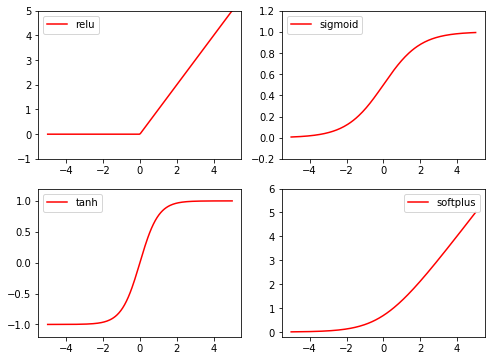

In [12]:
import torch
import torch.nn.functional as F     # 激励函数都在这
from torch.autograd import Variable

# 做一些假数据来观看图像
x = torch.linspace(-5, 5, 200)  # x data (tensor), shape=(100, 1)
x = Variable(x)

x_np = x.data.numpy()   # 换成 numpy array, 出图时用

# 几种常用的 激励函数
y_relu = F.relu(x).data.numpy()
y_sigmoid = F.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()
# y_softmax = F.softmax(x)  softmax 比较特殊, 不能直接显示, 不过他是关于概率的, 用于分类
import matplotlib.pyplot as plt  # python 的可视化模块, 我有教程 (https://morvanzhou.github.io/tutorials/data-manipulation/plt/)

plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()

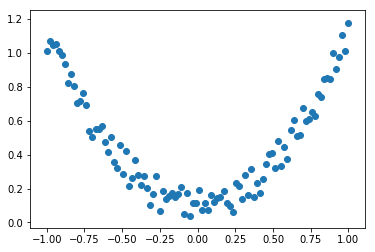

In [13]:
# regresion  example
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torch.nn.functional as F
#建立数据集
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# 用 Variable 来修饰这些数据 tensor
x, y = torch.autograd.Variable(x), Variable(y)

# 画图
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [14]:
import torch
import torch.nn.functional as F     # 激励函数都在这

class Net(torch.nn.Module):  # 继承 torch 的 Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()     # 继承 __init__ 功能
        # 定义每层用什么样的形式
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出
        self.predict = torch.nn.Linear(n_hidden, n_output)   # 输出层线性输出

    def forward(self, x):   # 这同时也是 Module 中的 forward 功能
        # 正向传播输入值, 神经网络分析出输出值
        x = F.relu(self.hidden(x))      # 激励函数(隐藏层的线性值)
        x = self.predict(x)             # 输出值
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)

print(net)  # net 的结构

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [15]:
# optimizer 是训练的工具
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)  # 传入 net 的所有参数, 学习率
loss_func = torch.nn.MSELoss()      # 预测值和真实值的误差计算公式 (均方差)

for t in range(100):
    prediction = net(x)     # 喂给 net 训练数据 x, 输出预测值

    loss = loss_func(prediction, y)     # 计算两者的误差

    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()        # 将参数更新值施加到 net 的 parameters 上

<IPython.core.display.Javascript object>


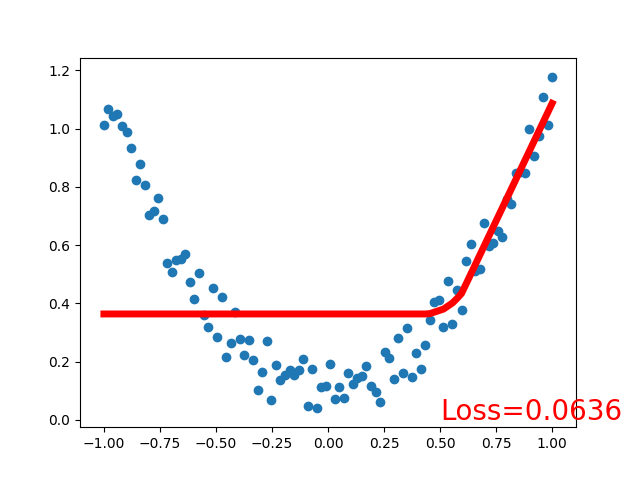

In [22]:
%matplotlib nbagg
import matplotlib.pyplot as plt

plt.ion()   # 画图
plt.show()

for t in range(100):
    prediction = net(x)     # 喂给 net 训练数据 x, 输出预测值

    loss = loss_func(prediction, y)     # 计算两者的误差

    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()        # 将参数更新值施加到 net 的 parameters 上

    # 接着上面来
    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)